<a href="https://colab.research.google.com/github/tgthunder/Customer-Churn-Prediction-Using-Neural-Network-Random-Forest-and-XGboost/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction Using Deep Neural Networks, Random Foreset , Xgboost

In [282]:
# Importing The Data Preprocessing Libraries
import numpy as np
import pandas as pd

In [283]:
# Importing the Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [322]:
# Importing the Libraries for Feature Engineering , Model Building , Model Evalution
from sklearn.preprocessing import LabelEncoder , StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [81]:
# Data Aquistion
df = pd.read_csv("train.csv")

# Exploratory Data Analysis
** **
**EDA is a crucial step that helps us to understand the data, uncover patterns, relationships and guides your subsequent decisions in feature engineering, model selection, and more.**

In [82]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [83]:
# Shape of the dataset
df.shape

(4250, 20)

In [84]:
# Exploring the number of attributes and number of entries in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [85]:
# Descriptive statistics of the data set
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,35.450000,0.000000,91.590000,67.000000,15.573500,118.200000,67.000000,10.050000,118.090000,67.000000,5.314500,5.700000,1.000000,1.540000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
90%,152.000000,31.000000,249.810000,125.000000,42.471000,264.310000,125.000000,22.470000,263.900000,125.000000,11.880000,13.700000,8.000000,3.700000,3.000000
95%,167.000000,36.000000,271.055000,133.000000,46.081000,282.710000,133.000000,24.031000,282.710000,132.000000,12.725500,14.600000,9.000000,3.940000,4.000000


In [86]:
# categorical data
categorical_data = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=11
                        and col not in "churn"]

categorical_data


['area_code',
 'international_plan',
 'voice_mail_plan',
 'number_customer_service_calls']

In [87]:
# Numeric data
numeric_data = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                    ]
numeric_data

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge']

no     3652
yes     598
Name: churn, dtype: int64



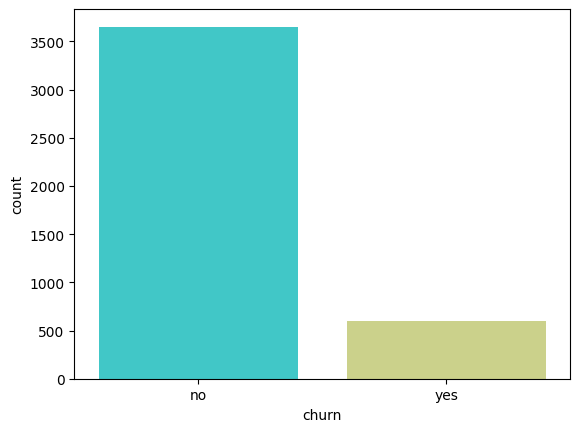

In [325]:
# Number of customers Churn/Not
print(df['churn'].value_counts())
print()
sns.countplot(x='churn',data=df,palette='rainbow')
plt.show()

Churn:
area_code_415    287
area_code_510    159
area_code_408    152
Name: area_code, dtype: int64

Not Churn:
area_code_415    1821
area_code_408     934
area_code_510     897
Name: area_code, dtype: int64


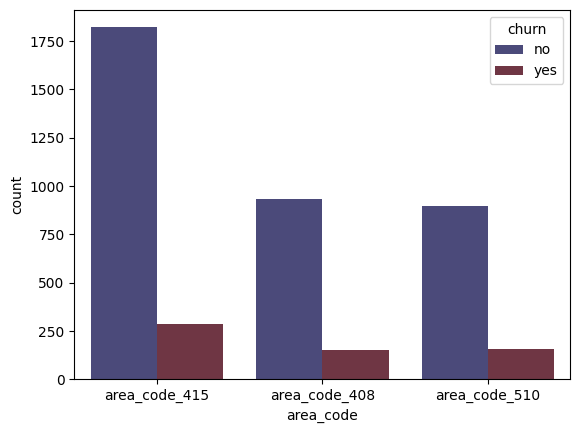

In [327]:
#Frequecy of Churn and Not Churn customers according to the Area Code

print(f"Churn:\n{df[df['churn'] == 'yes']['area_code'].value_counts()}")
print()
print(f"Not Churn:\n{df[df['churn'] == 'no']['area_code'].value_counts()}")
sns.countplot(x='area_code',hue='churn',data = df,palette='icefire')
plt.show()

Churn:
no     431
yes    167
Name: international_plan, dtype: int64

Not Churn:
no     3423
yes     229
Name: international_plan, dtype: int64


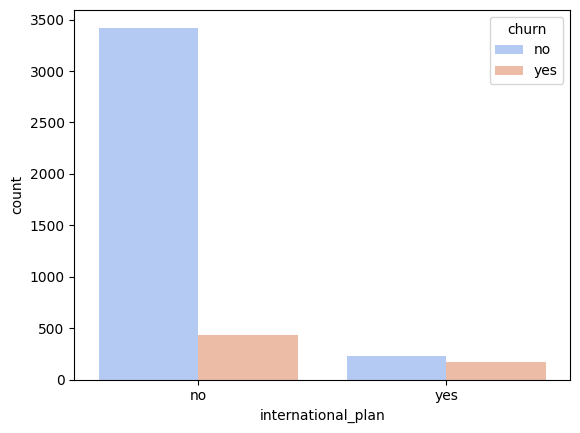

In [328]:
#Frequecy of Churn and Not Churn customers according to the International Plan

print(f"Churn:\n{df[df['churn'] == 'yes']['international_plan'].value_counts()}")
print()
print(f"Not Churn:\n{df[df['churn'] == 'no']['international_plan'].value_counts()}")
sns.countplot(x='international_plan',hue='churn',data = df , palette = 'coolwarm')
plt.show()

Churn:
no     516
yes     82
Name: voice_mail_plan, dtype: int64

Not Churn:
no     2622
yes    1030
Name: voice_mail_plan, dtype: int64


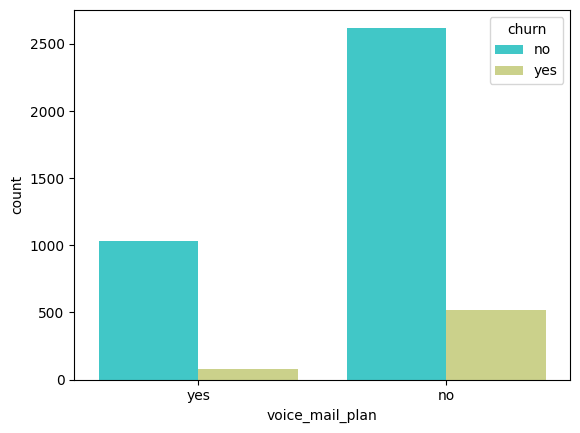

In [329]:
#Frequecy of Churn and Not Churn customers according to the International Plan

print(f"Churn:\n{df[df['churn'] == 'yes']['voice_mail_plan'].value_counts()}")
print()
print(f"Not Churn:\n{df[df['churn'] == 'no']['voice_mail_plan'].value_counts()}")
sns.countplot(x='voice_mail_plan',hue='churn',data = df,palette = 'rainbow')
plt.show()

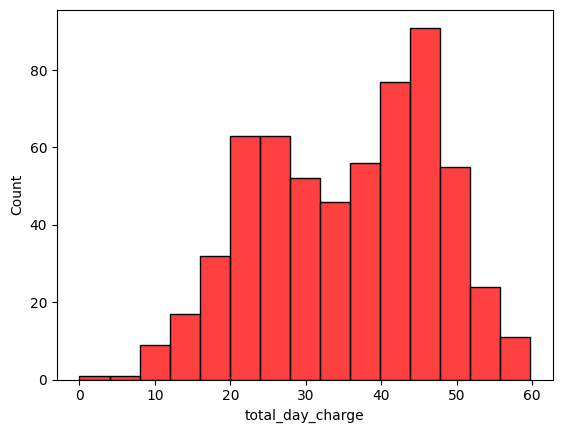

In [330]:
# distribution of the total_day_charge group for Churn
sns.histplot(x='total_day_charge',bins = 15 , data = df[df['churn']=='yes'],color = 'red')
plt.show()

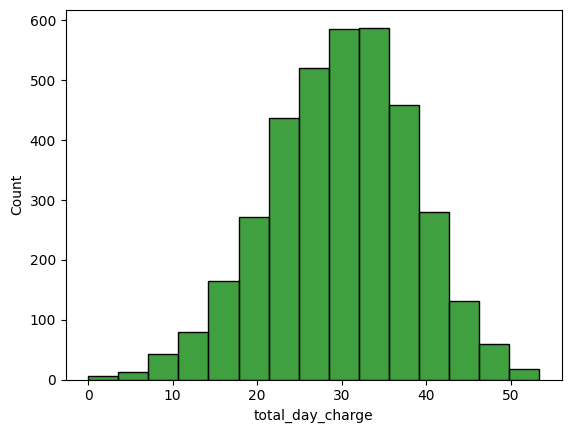

In [331]:
# distribution of the total_day_charge group for Not Churn
sns.histplot(x='total_day_charge',bins = 15 , data = df[df['churn']=='no'],color = 'green')
plt.show()

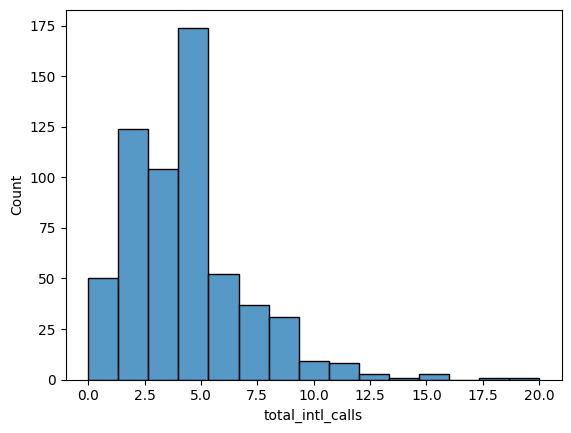

In [94]:
# distribution of the total_intl_calls group for Churn
sns.histplot(x='total_intl_calls',bins = 15 , data = df[df['churn']=='yes'])
plt.show()

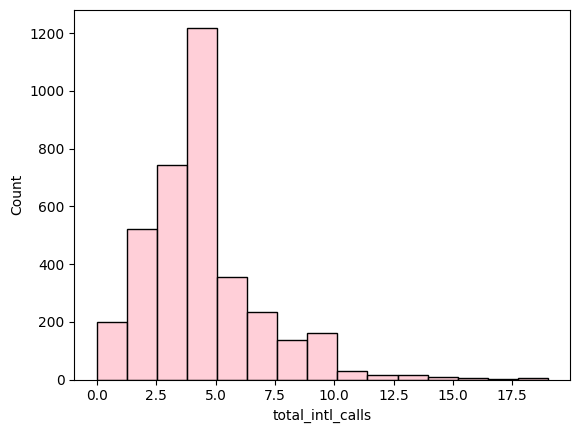

In [332]:
# distribution of the total_intl_calls group for Not Churn
sns.histplot(x='total_intl_calls',bins = 15 , data = df[df['churn']=='no'],color = 'pink')
plt.show()

# Data Cleaning
1. Handlling Missing Values
2. Data Transformation
3. Feature Enginnering




In [96]:
# Missing Values
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [97]:
# Data Redundency
df.duplicated().sum()

0

In [98]:
# Delete the unnecessary column
df.drop(['account_length'],axis=1,inplace = True)

In [99]:
# Categorical to Numeric:
def encode_categorical_columns(dataframe, categorical_columns):
    df = dataframe.copy()

    for col in categorical_columns:
        df[col] = df[col].astype('category').cat.codes

    return df

In [100]:
df_new = encode_categorical_columns(df,categorical_data)

In [101]:
encoder = LabelEncoder()

In [102]:
df_new['state'] = encoder.fit_transform(df_new['state'])

In [103]:
def impute(x):
  if x == 'yes':
    return 1
  else:
    return 0

In [104]:
df_new['churn'] = df_new['churn'].apply(impute)

In [105]:
df_new

,state,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,31,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,35,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,36,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,19,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,26,1,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,49,0,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,27,0,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,11,0,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


# **Outliers**

**Outliers can sometimes carry valuable information, especially in projects like customer churn prediction. Outliers might represent unusual or significant customer behaviors that could be indicative of potential churn. Therefore, in certain cases, removing outliers might lead to the loss of important insights.**

**We Keep the outliers for further processing**

In [334]:
X = df_new.iloc[:,0:-1].values
y = df_new.iloc[:,-1].values

In [285]:
# Our Dataset contains  Imbalanced  classes . We Will Use Oversampling Method Using Synthetic Minority Over-sampling Technique
smote = SMOTE(random_state=101, sampling_strategy='minority')

In [286]:
X_resampled , y_resampled = smote.fit_resample(X,y)

In [287]:
y_resampled_0 = [value for value in y_resampled if value == 0]
y_resampled_1 = [value for value in y_resampled if value == 1]
len(y_resampled_0) , len(y_resampled_1)

(3652, 3652)

In [288]:
# Now Our Classes are balanced

In [289]:
 X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=420)

In [290]:
# Feature Scaling
scaler = StandardScaler()

In [291]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Deep Neural Netowrk**

In [293]:
# Model Building

model = Sequential()
model.add(Dense(18,activation='relu',input_dim=18,kernel_regularizer=l2(0.01)))
model.add(Dense(18,activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(18,activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(9,activation="relu"))

model.add(Dense(1,activation='sigmoid'))  # OutPut Layer

In [294]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 18)                342       
                                                                 
 dense_36 (Dense)            (None, 18)                342       
                                                                 
 dense_37 (Dense)            (None, 18)                342       
                                                                 
 dense_38 (Dense)            (None, 9)                 171       
                                                                 
 dense_39 (Dense)            (None, 1)                 10        
                                                                 
Total params: 1,207
Trainable params: 1,207
Non-trainable params: 0
_________________________________________________________________


In [295]:
model.compile(optimizer='Adam',loss='binary_crossentropy')


In [296]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)
y_pred = model.predict(X_test_scaled)
y_preds = np.round(y_pred)

Epoch 1/100
147/147 [==============================] - 2s 4ms/step - loss: 1.0158 - val_loss: 0.8000
Epoch 2/100
147/147 [==============================] - 0s 3ms/step - loss: 0.6706 - val_loss: 0.5902
Epoch 3/100
147/147 [==============================] - 0s 3ms/step - loss: 0.5360 - val_loss: 0.5195
Epoch 4/100
147/147 [==============================] - 0s 3ms/step - loss: 0.4816 - val_loss: 0.4820
Epoch 5/100
147/147 [==============================] - 0s 3ms/step - loss: 0.4513 - val_loss: 0.4590
Epoch 6/100
147/147 [==============================] - 1s 4ms/step - loss: 0.4272 - val_loss: 0.4411
Epoch 7/100
147/147 [==============================] - 1s 6ms/step - loss: 0.4124 - val_loss: 0.4283
Epoch 8/100
147/147 [==============================] - 1s 5ms/step - loss: 0.3998 - val_loss: 0.4270
Epoch 9/100
147/147 [==============================] - 1s 5ms/step - loss: 0.3911 - val_loss: 0.4079
Epoch 10/100
147/147 [==============================] - 1s 4ms/step - loss: 0.3777 - val_lo

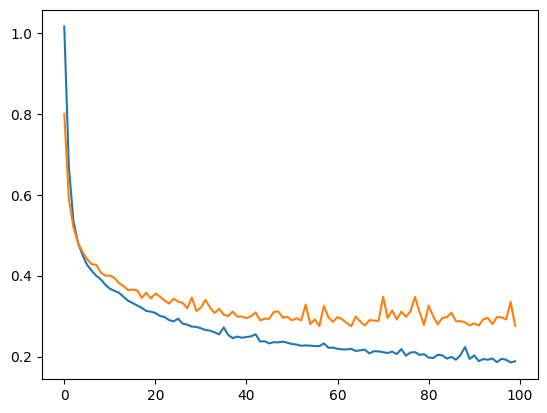

In [297]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [298]:
from sklearn.metrics import classification_report , confusion_matrix

In [299]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       712
           1       0.94      0.92      0.93       749

    accuracy                           0.93      1461
   macro avg       0.93      0.93      0.93      1461
weighted avg       0.93      0.93      0.93      1461



In [300]:
confusion_matrix(y_test,y_preds)

array([[666,  46],
       [ 61, 688]])

# **Random Forest**

In [301]:
from sklearn.ensemble import RandomForestClassifier

In [316]:
rf = RandomForestClassifier(max_depth=20,max_features=4,n_estimators=100,random_state = 101)

In [317]:
rf.fit(X_train_scaled , y_train)

RandomForestClassifier(max_depth=20, max_features=4, random_state=101)

In [318]:
y_pred = rf.predict(X_test_scaled)

In [319]:
confusion_matrix(y_test,y_pred)

array([[699,  13],
       [ 22, 727]])

In [320]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       712
           1       0.98      0.97      0.98       749

    accuracy                           0.98      1461
   macro avg       0.98      0.98      0.98      1461
weighted avg       0.98      0.98      0.98      1461



# **XgBoost**

In [307]:
from xgboost import XGBClassifier

In [312]:
xgb = XGBClassifier(n_estimators = 200 , max_depth = 20,random_state = 101)

In [313]:
xgb.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=101, ...)

In [314]:
y_pred_xgb = xgb.predict(X_test_scaled)

In [315]:
confusion_matrix(y_test,y_pred_xgb)

array([[699,  13],
       [ 27, 722]])

# Overall Summary : -
Within the scope of our customer churn prediction project, we embarked on a comparative analysis of three distinct machine learning algorithms: neural networks, random forest, and XGBoost. After conducting meticulous training and thorough evaluations, a notable trend emerged—both random forest and XGBoost consistently exhibited superior performance over the neural network, even with minimal hyperparameter fine-tuning. This observation held particular significance given the inherent imbalance within the dataset.

Since the dataset featured an imbalanced distribution, our evaluation centered around metrics that are particularly well-suited to such scenarios: the F1 score and confusion matrices. These metrics allowed us to assess the models' abilities to effectively navigate the challenges posed by the disproportionate representation of classes. Encouragingly, both random forest and XGBoost consistently displayed enhanced predictive capabilities compared to the neural network.